# importing libraries

# ndangira Webscrapping job adverts in Rwanda project
# This notebook will web-scrape the ndangira website and convert the html text into a dataframe for exporting as a .csv file.

# 1.Table of contents
# 2.Preparation
# 3.Ndangira webscrapping
# 4.requesting link from ndangira
# 5.Parsing html text
# 6.Building ndangira_job main page summary database
# 7.Dataset preparations
# 8.drop duplicated columns
# 9.Saving data into csv


# importing libraries

In [1]:
#Import libraries
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import re
import requests
ndangira=[]
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# requesting link from ndangira


In [2]:
# Requesting a link from Ndangira for summary job information
ndangira_response = requests.get('https://www.ndangira.net/category/jobs-in-rwanda/')


# Parsing html into text 

In [3]:
# Ndangira text parsing - main page summary job info
ndangira_soup = BeautifulSoup(ndangira_response.text)
# Creating Ndangira summary text info
ndangira_scrape = ndangira_soup.find_all(class_="fusion-post-content post-content")
ndangira_scrape  


[<div class="fusion-post-content post-content">
 <h2 class="entry-title fusion-post-title"><a href="https://www.ndangira.net/administrative-assistant-to-the-vice-president-2-positions-senate/">Administrative Assistant to the Vice-President ( 2 Positions) – SENATE</a></h2>
 <span class="vcard rich-snippet-hidden"><span class="fn"><a href="https://www.ndangira.net/author/felix2017/" rel="author" title="Posts by Admin">Admin</a></span></span><span class="updated rich-snippet-hidden">2022-04-27T19:34:41+02:00</span>
 <div class="fusion-post-content-container">
 <p>Closing date: May 05,2022 | Location: Kigali, Rwanda</p> </div>
 </div>,
 <div class="fusion-post-content post-content">
 <h2 class="entry-title fusion-post-title"><a href="https://www.ndangira.net/communication-officer-2/">Communication Officer ( 2 Positions) – SENATE</a></h2>
 <span class="vcard rich-snippet-hidden"><span class="fn"><a href="https://www.ndangira.net/author/felix2017/" rel="author" title="Posts by Admin">Admin</

# Building ndangira_job main page summary database 

In [4]:
for i in range(1,30):
    url='https://www.ndangira.net/category/jobs-in-rwanda/page/'+str(i)+'/'
    response=requests.get(url)
    soup=BeautifulSoup(response.text)
    ndangira_scrape =soup.find_all(class_="fusion-post-content post-content")
    #ndangira_scrape 
    #print(url)
# creating empty list to add data in it.
    job_ndangira_dictionary=[]
    # looping to web scrape different information from web

    for i in ndangira_scrape:
        try:
            #to collect all paragraphy
            closing_date=i.find(class_="fusion-post-content-container").get_text().strip().split('|')[0]
            location=i.find(class_="fusion-post-content-container").get_text().split('|')[1]
            # to create dictionary to add data, starting with title of jobs
            job_info ={'title':i.find('h2').get_text().strip()}
            #link of ndangira
            job_url=i.find_all('a')[0]['href']
            job_info['job_url']=job_url
            job_info['closing_date']=closing_date
            job_info['location']=location
            
        except:
            continue
      #to append dictionary to a list
        job_ndangira_dictionary.append(job_info)
    #to craete dataframe from a list:
    df_ndangira=pd.DataFrame(job_ndangira_dictionary)
    ndangira.append(df_ndangira)
    print(df_ndangira)


                                               title  \
0  Administrative Assistant to the Vice-President...   
1      Communication Officer ( 2 Positions) – SENATE   
2                Protection Assistant – UNHCR Rwanda   
3                Innovation Facilitator – FAO Rwanda   
4      Loan Officers – ASA Microfinance (Rwanda) Plc   

                                             job_url  \
0  https://www.ndangira.net/administrative-assist...   
1  https://www.ndangira.net/communication-officer-2/   
2  https://www.ndangira.net/protection-assistant-...   
3  https://www.ndangira.net/innovation-facilitato...   
4  https://www.ndangira.net/loan-officers-asa-mic...   

                 closing_date                    location  
0  Closing date: May 05,2022    Location: Kigali, Rwanda   
1  Closing date: May 05,2022    Location: Kigali, Rwanda   
2  Closing date: May 09,2022      Location: Huye, Rwanda   
3  Closing date: May 10,2022    Location: Kigali, Rwanda   
4  Closing date: May 20,20

                                               title  \
0  Health Communication Coordinator ( 3 Positions...   
1  Job vacancies – Protestant Institute of Arts a...   
2                   Job vacancies – RwandAir Limited   
3  Job opportunities – SOS Children’s Villages Rw...   
4  BLF Education Technical Lead – Education Devel...   

                                             job_url  \
0  https://www.ndangira.net/health-communication-...   
1  https://www.ndangira.net/job-vacancies-protest...   
2   https://www.ndangira.net/job-vacancies-rwandair/   
3  https://www.ndangira.net/job-opportunities-sos...   
4  https://www.ndangira.net/blf-education-technic...   

                        closing_date  \
0       Closing date: April 26,2022    
1       Closing date: April 18,2022    
2            Deadline: April 30,2022   
3  Closing date: April 19 & 20,2022    
4       Closing date: April 22,2022    

                                            location  
0   Location: Nyamasheke, Bure

                                               title  \
0       ASRH Project Coordinator – Save the Children   
1  Internship opportunities – Akazi Kanoze Access...   
2  Job vacancies – University of Global Health Eq...   
3               Job opportunities – NCBA Bank Rwanda   
4  Environmental & Social Safeguard Officer ( 08 ...   

                                             job_url  \
0  https://www.ndangira.net/asrh-project-coordina...   
1  https://www.ndangira.net/internship-opportunit...   
2  https://www.ndangira.net/job-vacancies-univers...   
3  https://www.ndangira.net/job-opportunities-ncb...   
4  https://www.ndangira.net/environmental-social-...   

                   closing_date  \
0  Closing date: April 08,2022    
1  Closing date: March 29,2022    
2  Closing date: April 07,2022    
3         Closing date: Varies    
4  Closing date: March 30,2022    

                                            location  
0                          Location: Kigali, Rwanda   
1   L

                                               title  \
0  Companies/Organizations hiring drivers right now!   
1          Job vacancies – Business Development Fund   
2  Job opportunities – Africa Humanitarian Action...   
3  BNR – Selection List for Young Professional Tr...   
4               Sales Representative – The New Times   

                                             job_url  \
0  https://www.ndangira.net/driver-job-vacancies-...   
1  https://www.ndangira.net/job-vacancies-busines...   
2  https://www.ndangira.net/job-opportunities-afr...   
3  https://www.ndangira.net/bnr-selection-list-fo...   
4  https://www.ndangira.net/sales-representative-...   

                                closing_date  \
0          Closing date: March 15 & 22,2022    
1               Closing date: March 24,2022    
2               Closing date: March 11,2022    
3  Written test : March 17,2022 (10: 00 am)    
4                Closing date: Marc 15,2022    

                                     

In [5]:
final=pd.concat(ndangira)
final 

,title,job_url,closing_date,location
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,"Closing date: May 05,2022","Location: Kigali, Rwanda"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,"Closing date: May 05,2022","Location: Kigali, Rwanda"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,"Closing date: May 09,2022","Location: Huye, Rwanda"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,"Closing date: May 10,2022","Location: Kigali, Rwanda"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,"Closing date: May 20,2022","Location: Kigali, Rwanda"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,"Closing date: March 04,2022","Location: Kigali, Rwanda"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,"Closing date: March 13,2022","Location: Kigali, Rwanda"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,"Closing date: February 24,2022",Location: Rwanda
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,"Deadline: March 01,2022","Location: Kigali, Rwanda"


# Dataset preparations

In [6]:
# to split closing date
drop_close=final["closing_date"].str.split(pat=':',expand=True)
drop_close

,0,1,2
0,Closing date,"May 05,2022",None
1,Closing date,"May 05,2022",None
2,Closing date,"May 09,2022",None
3,Closing date,"May 10,2022",None
4,Closing date,"May 20,2022",None
...,...,...,...
4,Closing date,"March 04,2022",None
0,Closing date,"March 13,2022",None
1,Closing date,"February 24,2022",None
2,Deadline,"March 01,2022",None


In [7]:
# we selected clomun[1]
# we put column selected into list
r=drop_close.rename( columns={0:'closing date' } ,inplace=False)
clos=r[1].to_list()
clos

[' May 05,2022 ',
 ' May 05,2022 ',
 ' May 09,2022 ',
 ' May 10,2022 ',
 ' May 20,2022 ',
 ' Varies ',
 ' Varies ',
 ' April 29,2022 ',
 ' May 04,2022 ',
 ' May 04 & 06,2022 ',
 ' May 11,2022 ',
 ' May 03,2022 ',
 ' April 30,2022 ',
 ' April 27,2022 ',
 ' April 22,2022 ',
 ' April 29,2022 ',
 ' April 27,2022 ',
 ' May 04,2022 ',
 ' May 15,2022 ',
 ' April 29,2022 ',
 ' Varies ',
 ' Varies ',
 ' April 29,2022 ',
 ' April 29,2022 ',
 ' April 28,2022 ',
 ' April 25,2022 ',
 ' April 21,2022 ',
 ' April 25,2022 ',
 ' April 28,2022 ',
 ' April 18 & 29,2022 ',
 ' April 21 & 24, 2022 ',
 ' April 19,2022 ',
 ' April 18,2022 ',
 ' April 22,2022 ',
 ' April 27,2022 ',
 ' May 15,2022 ',
 ' April 30,2022 ',
 ' May 03,2022 ',
 ' April 24,2022 ',
 ' April 26,2022 ',
 ' April 18,2022 ',
 ' April 30,2022',
 ' April 19 & 20,2022 ',
 ' April 22,2022 ',
 ' April 15,2022 ',
 ' April 19,2022 ',
 ' April 15,2022 ',
 ' April 22,2022 ',
 ' Varies ',
 ' Varies ',
 ' April 14,2022 ',
 ' May 06,2022',
 '  April 1

In [8]:
# Dataframe and add list colum(closing_date)
final['closing_Date']=clos
final

,title,job_url,closing_date,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,"Closing date: May 05,2022","Location: Kigali, Rwanda","May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,"Closing date: May 05,2022","Location: Kigali, Rwanda","May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,"Closing date: May 09,2022","Location: Huye, Rwanda","May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,"Closing date: May 10,2022","Location: Kigali, Rwanda","May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,"Closing date: May 20,2022","Location: Kigali, Rwanda","May 20,2022"
...,...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,"Closing date: March 04,2022","Location: Kigali, Rwanda","March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,"Closing date: March 13,2022","Location: Kigali, Rwanda","March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,"Closing date: February 24,2022",Location: Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,"Deadline: March 01,2022","Location: Kigali, Rwanda","March 01,2022"


In [9]:
# drop duplicated columns
final_dataset=final.drop('closing_date',axis=1)
final_dataset

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,"Location: Kigali, Rwanda","May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,"Location: Kigali, Rwanda","May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,"Location: Huye, Rwanda","May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,"Location: Kigali, Rwanda","May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,"Location: Kigali, Rwanda","May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,"Location: Kigali, Rwanda","March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,"Location: Kigali, Rwanda","March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Location: Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,"Location: Kigali, Rwanda","March 01,2022"


# Saving data into csv 

In [10]:
# saving final data frame.
final_dataset.to_csv('Ndangira_April_19.csv')

In [11]:
final_dataset

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,"Location: Kigali, Rwanda","May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,"Location: Kigali, Rwanda","May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,"Location: Huye, Rwanda","May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,"Location: Kigali, Rwanda","May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,"Location: Kigali, Rwanda","May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,"Location: Kigali, Rwanda","March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,"Location: Kigali, Rwanda","March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Location: Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,"Location: Kigali, Rwanda","March 01,2022"


In [12]:
a=final_dataset['title']
a

0    Administrative Assistant to the Vice-President...
1        Communication Officer ( 2 Positions) – SENATE
2                  Protection Assistant – UNHCR Rwanda
3                  Innovation Facilitator – FAO Rwanda
4        Loan Officers – ASA Microfinance (Rwanda) Plc
                           ...                        
4    Advocacy & Communication Officer – National Un...
0                    Project finance officer – Cordaid
1    Customs technical officer ( 19 Positions) – Rw...
2    Job announcement under Sugira Muryango : Scali...
3                  Strategy and Policy Expert – Enabel
Name: title, Length: 142, dtype: object

In [13]:
b=final_dataset['location']
b

0     Location: Kigali, Rwanda 
1     Location: Kigali, Rwanda 
2       Location: Huye, Rwanda 
3     Location: Kigali, Rwanda 
4     Location: Kigali, Rwanda 
                ...            
4     Location: Kigali, Rwanda 
0     Location: Kigali, Rwanda 
1             Location: Rwanda 
2     Location: Kigali, Rwanda 
3     Location: Kigali, Rwanda 
Name: location, Length: 142, dtype: object

In [14]:
# to split closing date
drop_loca=final["location"].str.split(pat=':',expand=True)
drop_loca

,0,1
0,Location,"Kigali, Rwanda"
1,Location,"Kigali, Rwanda"
2,Location,"Huye, Rwanda"
3,Location,"Kigali, Rwanda"
4,Location,"Kigali, Rwanda"
...,...,...
4,Location,"Kigali, Rwanda"
0,Location,"Kigali, Rwanda"
1,Location,Rwanda
2,Location,"Kigali, Rwanda"


In [15]:
# we selected clomun[1]
# we put column selected into list
f=drop_loca.rename( columns={0:'location' } ,inplace=False)
f
g=f. drop('location', axis=1, inplace=False)
g
locat=g[1].to_list()
locat

[' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Huye, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Nyagatare, Gatsibo, Kamonyi, Muhanga, Ruhango and Ngororero districts, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Burera IMB/PIH Site, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Rwanda ',
 ' Rwanda ',
 ' Kigali, Rwanda ',
 ' Rwanda ',
 ' Kigali, Rwanda ',
 ' Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Rwanda ',
 ' Nyamasheke, Burera and Gisagara, Rwanda ',
 ' Huye, Rwanda ',
 ' Kigali, Rwanda ',
 ' Kigali, Kayonza & Gicumbi, Kamonyi, Kicukiro, and 

In [16]:
# Dataframe and add list colum(closing_date)
final_dataset['location']=locat
final_dataset

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,"Kigali, Rwanda","May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,"Kigali, Rwanda","May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,"Huye, Rwanda","May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,"Kigali, Rwanda","May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,"Kigali, Rwanda","May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,"Kigali, Rwanda","March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,"Kigali, Rwanda","March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,"Kigali, Rwanda","March 01,2022"


In [17]:
final_dataset['title'].value_counts()

Administrative Assistant to the Vice-President ( 2 Positions) – SENATE        1
Senior Strategy Specialist – Hope International                               1
Nursery English teacher and Boarding supervisor – Green Hills Academy         1
Job opportunities at Green Hills Academy                                      1
Programme Associate – UNDP Rwanda                                             1
                                                                             ..
Job vacancies – RwandAir Limited                                              1
Job vacancies – Protestant Institute of Arts and Social Sciences (PIASS) |    1
Health Communication Coordinator ( 3 Positions) – World Relief Rwanda         1
Job vacancies –  Practical Action                                             1
Strategy and Policy Expert – Enabel                                           1
Name: title, Length: 142, dtype: int64

In [18]:
final_dataset['location'].value_counts()

 Kigali, Rwanda                                                                    96
 Rwanda                                                                            12
 Huye, Rwanda                                                                       3
 Kigali , Rwanda                                                                    2
 Kigali with field travels in the areas of operations                               1
 Kigali, Rwanda                                                                     1
 Kigali, rwanda                                                                     1
 ULK Gisozi                                                                         1
 Kiziba, Kigeme & Mugombwa , Rwanda                                                 1
 Kayonza and Burera Districts, Rwanda                                               1
 Gatsibo, Rwanda                                                                    1
 Rwanda/ Ethiopia/ Kenya                              

In [19]:
s=final_dataset['title'].value_counts()
s

Administrative Assistant to the Vice-President ( 2 Positions) – SENATE        1
Senior Strategy Specialist – Hope International                               1
Nursery English teacher and Boarding supervisor – Green Hills Academy         1
Job opportunities at Green Hills Academy                                      1
Programme Associate – UNDP Rwanda                                             1
                                                                             ..
Job vacancies – RwandAir Limited                                              1
Job vacancies – Protestant Institute of Arts and Social Sciences (PIASS) |    1
Health Communication Coordinator ( 3 Positions) – World Relief Rwanda         1
Job vacancies –  Practical Action                                             1
Strategy and Policy Expert – Enabel                                           1
Name: title, Length: 142, dtype: int64

In [20]:
# finding number record in  location
k=final_dataset['location'].value_counts()
k

 Kigali, Rwanda                                                                    96
 Rwanda                                                                            12
 Huye, Rwanda                                                                       3
 Kigali , Rwanda                                                                    2
 Kigali with field travels in the areas of operations                               1
 Kigali, Rwanda                                                                     1
 Kigali, rwanda                                                                     1
 ULK Gisozi                                                                         1
 Kiziba, Kigeme & Mugombwa , Rwanda                                                 1
 Kayonza and Burera Districts, Rwanda                                               1
 Gatsibo, Rwanda                                                                    1
 Rwanda/ Ethiopia/ Kenya                              

In [21]:
b=final_dataset
b

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,"Kigali, Rwanda","May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,"Kigali, Rwanda","May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,"Huye, Rwanda","May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,"Kigali, Rwanda","May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,"Kigali, Rwanda","May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,"Kigali, Rwanda","March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,"Kigali, Rwanda","March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,"Kigali, Rwanda","March 01,2022"


In [22]:
b['title']

0    Administrative Assistant to the Vice-President...
1        Communication Officer ( 2 Positions) – SENATE
2                  Protection Assistant – UNHCR Rwanda
3                  Innovation Facilitator – FAO Rwanda
4        Loan Officers – ASA Microfinance (Rwanda) Plc
                           ...                        
4    Advocacy & Communication Officer – National Un...
0                    Project finance officer – Cordaid
1    Customs technical officer ( 19 Positions) – Rw...
2    Job announcement under Sugira Muryango : Scali...
3                  Strategy and Policy Expert – Enabel
Name: title, Length: 142, dtype: object

In [23]:
b['location']

0     Kigali, Rwanda 
1     Kigali, Rwanda 
2       Huye, Rwanda 
3     Kigali, Rwanda 
4     Kigali, Rwanda 
           ...       
4     Kigali, Rwanda 
0     Kigali, Rwanda 
1             Rwanda 
2     Kigali, Rwanda 
3     Kigali, Rwanda 
Name: location, Length: 142, dtype: object

In [24]:
b['location']

0     Kigali, Rwanda 
1     Kigali, Rwanda 
2       Huye, Rwanda 
3     Kigali, Rwanda 
4     Kigali, Rwanda 
           ...       
4     Kigali, Rwanda 
0     Kigali, Rwanda 
1             Rwanda 
2     Kigali, Rwanda 
3     Kigali, Rwanda 
Name: location, Length: 142, dtype: object

In [25]:
# to split  location
drop_location=b["location"].str.split(pat=',',expand=True)
drop_location
drop_location[0]

0      Kigali
1      Kigali
2        Huye
3      Kigali
4      Kigali
       ...   
4      Kigali
0      Kigali
1     Rwanda 
2      Kigali
3      Kigali
Name: 0, Length: 142, dtype: object

In [26]:
# we selected clomun[1]
# we put column selected into list
h=drop_location.rename( columns={0:'location_city' } ,inplace=False)
location=drop_location[0].to_list()
location
    


[' Kigali',
 ' Kigali',
 ' Huye',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Nyagatare',
 ' Kigali',
 ' Kigali',
 ' Burera IMB/PIH Site',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Rwanda ',
 ' Rwanda ',
 ' Kigali',
 ' Rwanda ',
 ' Kigali',
 ' Rwanda ',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Nyamasheke',
 ' Huye',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 '\xa0Kigali International Airport\xa0 ',
 ' AHA CO ',
 ' Kigali',
 ' Kigali',
 ' Kigali ',
 ' Ngarama',
 ' Rwanda ',
 ' Kamonyi',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Huye & Nyamata',
 ' Kigali',
 ' Rwamagana',
 ' Kigali',
 ' Kigali',
 ' Multiple locations in Rwanda ',
 ' Rwanda ',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Huye',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',
 ' Kigali',


In [27]:
b['location']=location
b

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022"


In [28]:
b

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022"
1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022"
2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022"
3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022"
4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022"
0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022"
1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022"


In [29]:

# reseting index on splited columns
index2=b.reset_index()
index2

,index,title,job_url,location,closing_Date
0,0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022"
1,1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022"
2,2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022"
3,3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022"
4,4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022"
...,...,...,...,...,...
137,4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022"
138,0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022"
139,1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
140,2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022"


In [30]:
# to split  job title column
drop_job_title=b["title"].str.split(pat=' – ',expand=True)
drop_job_title


,0,1
0,Administrative Assistant to the Vice-President...,SENATE
1,Communication Officer ( 2 Positions),SENATE
2,Protection Assistant,UNHCR Rwanda
3,Innovation Facilitator,FAO Rwanda
4,Loan Officers,ASA Microfinance (Rwanda) Plc
...,...,...
4,Advocacy & Communication Officer,National Union of Disability Organizations in ...
0,Project finance officer,Cordaid
1,Customs technical officer ( 19 Positions),Rwanda Revenue Authority
2,Job announcement under Sugira Muryango : Scali...,None


In [31]:
# reneming  column splited on job_title column
f=drop_job_title.rename( columns={0:'job_title',1:'company_name' } ,inplace=False)
f

,job_title,company_name
0,Administrative Assistant to the Vice-President...,SENATE
1,Communication Officer ( 2 Positions),SENATE
2,Protection Assistant,UNHCR Rwanda
3,Innovation Facilitator,FAO Rwanda
4,Loan Officers,ASA Microfinance (Rwanda) Plc
...,...,...
4,Advocacy & Communication Officer,National Union of Disability Organizations in ...
0,Project finance officer,Cordaid
1,Customs technical officer ( 19 Positions),Rwanda Revenue Authority
2,Job announcement under Sugira Muryango : Scali...,None


In [32]:
#reseting index on splited column  both  job_title and company_name
index=f.reset_index()
index

,index,job_title,company_name
0,0,Administrative Assistant to the Vice-President...,SENATE
1,1,Communication Officer ( 2 Positions),SENATE
2,2,Protection Assistant,UNHCR Rwanda
3,3,Innovation Facilitator,FAO Rwanda
4,4,Loan Officers,ASA Microfinance (Rwanda) Plc
...,...,...,...
137,4,Advocacy & Communication Officer,National Union of Disability Organizations in ...
138,0,Project finance officer,Cordaid
139,1,Customs technical officer ( 19 Positions),Rwanda Revenue Authority
140,2,Job announcement under Sugira Muryango : Scali...,None


In [33]:
# we selected clomun of job_title 
# we put column selected into list

job_title=f['job_title'].to_list()
job_title
    


['Administrative Assistant to the Vice-President ( 2 Positions)',
 'Communication Officer ( 2 Positions)',
 'Protection Assistant',
 'Innovation Facilitator',
 'Loan Officers',
 'Job vacancies',
 'Job opportunities',
 'Job opportunities',
 'Job vacancies',
 'Job opportunities',
 'Accounts Assistant',
 'Audio Visual Communication Officer',
 'Internship opportunity',
 'Human Resources Associate',
 'E T Temporary ( Team Assistant )',
 'Rural Physical Planner ( 3 Positions)',
 'Internship Opportunity',
 'Advisor and Liaison Officer',
 'Operations manager ',
 'Marketing and Public Relations Director',
 'Job & Internship opportunities',
 'Job vacancies',
 'Job Vacancies',
 'Field Data Collectors',
 'Country Programme Assistant',
 'Finance & Grants Officer\xa0',
 'Driver',
 'Job opportunities',
 'Job vacancies',
 'Job vacancies',
 'Job opportunities',
 '250 Stores Accountants Officers ( 5 Positions)',
 'Research Specialist',
 'Projects Assistant',
 'Gender & Inclusion Advisor',
 'Agriculture 

In [34]:
# we selected clomun of company_name
# we put column selected into list

company_name=f['company_name'].to_list()
company_name

['SENATE',
 'SENATE',
 'UNHCR Rwanda',
 'FAO Rwanda',
 'ASA Microfinance (Rwanda) Plc',
 ' Save the Children',
 'World Relief Rwanda',
 'Rwanda Development Organization (RDO)',
 'Energy Development Corporation Limited (EDCL)',
 'Interpeace',
 'African Management Institute',
 'UN Volunteer',
 'UNDP Rwanda',
 'UNICEF Rwanda',
 'World Bank Group',
 'Rwanda Land Management and use Authority',
 'IntraHealth',
 'GIZ Rwanda',
 'Handicap International Federation',
 'Green Hills Academy',
 'AIMS Rwanda',
 'U.S Embassy in Rwanda',
 'National Bank of Rwanda',
 'FH Association (Food for the Hungry)',
 'IFAD',
 'Education Development Trust',
 'Partners In Health/Inshuti Mu Buzima (PIH)',
 'Rwanda Development Board',
 'Rwanda Red Cross',
 'World Vision Rwanda',
 'Alight (formerly American Refugee Committee)',
 'Bralirwa Plc',
 'Manoff Group',
 'International Transformation Foundation',
 'Interpeace',
 'Palladium',
 'Alight',
 'Tearfund',
 ' Practical Action',
 'World Relief Rwanda',
 'Protestant Ins

In [35]:
b['title']=job_title
b

,title,job_url,location,closing_Date
0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022"
1,Communication Officer ( 2 Positions),https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022"
2,Protection Assistant,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022"
3,Innovation Facilitator,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022"
4,Loan Officers,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022"
...,...,...,...,...
4,Advocacy & Communication Officer,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022"
0,Project finance officer,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022"
1,Customs technical officer ( 19 Positions),https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022"


In [36]:
#  converting  list
b['title']=company_name

In [37]:
b

,title,job_url,location,closing_Date
0,SENATE,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022"
1,SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022"
2,UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022"
3,FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022"
4,ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022"
...,...,...,...,...
4,National Union of Disability Organizations in ...,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022"
0,Cordaid,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022"
1,Rwanda Revenue Authority,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022"
2,None,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022"


In [38]:

#merging two dataframe  on index  after  reseting it an index
final=pd. merge(index2,index,left_index=True, right_index=True)
final

,index_x,title,job_url,location,closing_Date,index_y,job_title,company_name
0,0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022",0,Administrative Assistant to the Vice-President...,SENATE
1,1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022",1,Communication Officer ( 2 Positions),SENATE
2,2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022",2,Protection Assistant,UNHCR Rwanda
3,3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022",3,Innovation Facilitator,FAO Rwanda
4,4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022",4,Loan Officers,ASA Microfinance (Rwanda) Plc
...,...,...,...,...,...,...,...,...
137,4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022",4,Advocacy & Communication Officer,National Union of Disability Organizations in ...
138,0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022",0,Project finance officer,Cordaid
139,1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022",1,Customs technical officer ( 19 Positions),Rwanda Revenue Authority
140,2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022",2,Job announcement under Sugira Muryango : Scali...,None


In [39]:
#finding descriptives statistics of ndangira webscraping final dataset
#final['job_title'].sum(1)


In [40]:
final['job_title']


0      Administrative Assistant to the Vice-President...
1                   Communication Officer ( 2 Positions)
2                                   Protection Assistant
3                                 Innovation Facilitator
4                                          Loan Officers
                             ...                        
137                     Advocacy & Communication Officer
138                              Project finance officer
139            Customs technical officer ( 19 Positions)
140    Job announcement under Sugira Muryango : Scali...
141                           Strategy and Policy Expert
Name: job_title, Length: 142, dtype: object

In [41]:
final['location']

0        Kigali
1        Kigali
2          Huye
3        Kigali
4        Kigali
         ...   
137      Kigali
138      Kigali
139     Rwanda 
140      Kigali
141      Kigali
Name: location, Length: 142, dtype: object

In [51]:
#finding number of counts in job_title
final['job_title'].count()

142

In [43]:
#finding number of count  on company name
final['company_name'].value_counts()

UNDP Rwanda                                                   3
SENATE                                                        2
Hope International                                            2
IOM Rwanda                                                    2
Plan International                                            2
                                                             ..
RwandAir Limited                                              1
Protestant Institute of Arts and Social Sciences (PIASS) |    1
 Practical Action                                             1
Tearfund                                                      1
Enabel                                                        1
Name: company_name, Length: 115, dtype: int64

In [44]:
#finding number of count  on location
final['location'].value_counts()

 Kigali                                                    101
 Rwanda                                                     12
 Huye                                                        3
 AHA CO                                                      2
 Kigali                                                      2
 Kayonza and Burera Districts                                1
 Kigali with field travels in the areas of operations        1
 ULK Gisozi                                                  1
 Kiziba                                                      1
 Gatsibo                                                     1
 Rwanda/ Ethiopia/ Kenya                                     1
 Arusha                                                      1
 Kigali or Rubengera                                         1
 Districts in Rwanda                                         1
 Kigali & Huye                                               1
 Multiple locations in Rwanda                          

In [45]:
#finding number of count  on location
final['closing_Date'].value_counts()

 Varies                 9
 April 15,2022          7
 April 14,2022          5
 April 29,2022          5
 April 08,2022          4
                       ..
 March 28,2022          1
 April 18 & 29,2022     1
 March 27,2022          1
 April 10,2022          1
 March 01,2022          1
Name: closing_Date, Length: 75, dtype: int64

In [46]:
final

,index_x,title,job_url,location,closing_Date,index_y,job_title,company_name
0,0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022",0,Administrative Assistant to the Vice-President...,SENATE
1,1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022",1,Communication Officer ( 2 Positions),SENATE
2,2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022",2,Protection Assistant,UNHCR Rwanda
3,3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022",3,Innovation Facilitator,FAO Rwanda
4,4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022",4,Loan Officers,ASA Microfinance (Rwanda) Plc
...,...,...,...,...,...,...,...,...
137,4,Advocacy & Communication Officer – National Un...,https://www.ndangira.net/advocacy-communicatio...,Kigali,"March 04,2022",4,Advocacy & Communication Officer,National Union of Disability Organizations in ...
138,0,Project finance officer – Cordaid,https://www.ndangira.net/project-finance-offic...,Kigali,"March 13,2022",0,Project finance officer,Cordaid
139,1,Customs technical officer ( 19 Positions) – Rw...,https://www.ndangira.net/customs-technical-off...,Rwanda,"February 24,2022",1,Customs technical officer ( 19 Positions),Rwanda Revenue Authority
140,2,Job announcement under Sugira Muryango : Scali...,https://www.ndangira.net/job-announcement-unde...,Kigali,"March 01,2022",2,Job announcement under Sugira Muryango : Scali...,None


In [47]:
# selecting  only two column from ndangira web final dataset
sd=final.reindex(columns=['job_title','location'])
sd.dtypes
sd

,job_title,location
0,Administrative Assistant to the Vice-President...,Kigali
1,Communication Officer ( 2 Positions),Kigali
2,Protection Assistant,Huye
3,Innovation Facilitator,Kigali
4,Loan Officers,Kigali
...,...,...
137,Advocacy & Communication Officer,Kigali
138,Project finance officer,Kigali
139,Customs technical officer ( 19 Positions),Rwanda
140,Job announcement under Sugira Muryango : Scali...,Kigali


Text(0.5, 1.0, 'COUNT OF JOB_TITLE   FOR EACH LOCATOION')

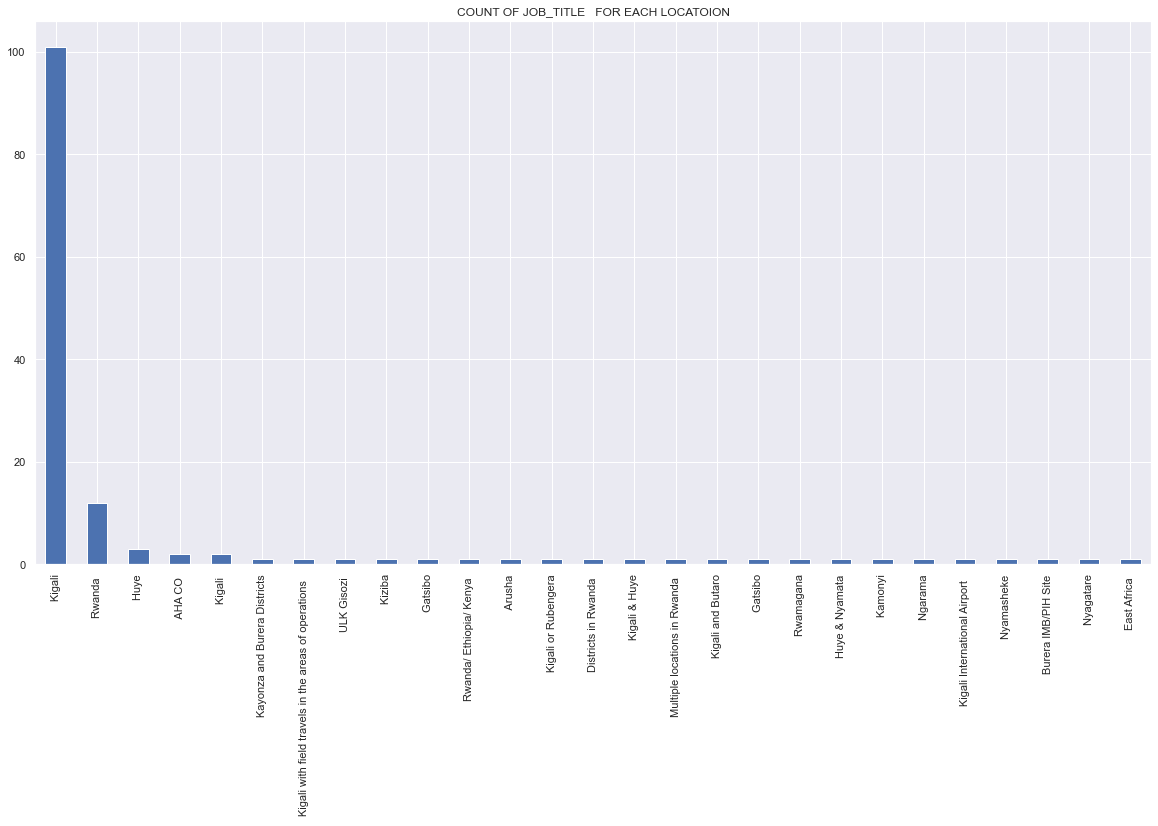

In [48]:
#plotting location  value_counts
sd['location'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title("COUNT OF JOB_TITLE   FOR EACH LOCATOION")

In [49]:
final_top_30=sd.iloc[:30]
final_top_30

,job_title,location
0,Administrative Assistant to the Vice-President...,Kigali
1,Communication Officer ( 2 Positions),Kigali
2,Protection Assistant,Huye
3,Innovation Facilitator,Kigali
4,Loan Officers,Kigali
5,Job vacancies,Kigali
6,Job opportunities,Kigali
7,Job opportunities,Kigali
8,Job vacancies,Kigali
9,Job opportunities,Kigali


Text(0.5, 1.0, 'COUNT OF JOB_TITLE')

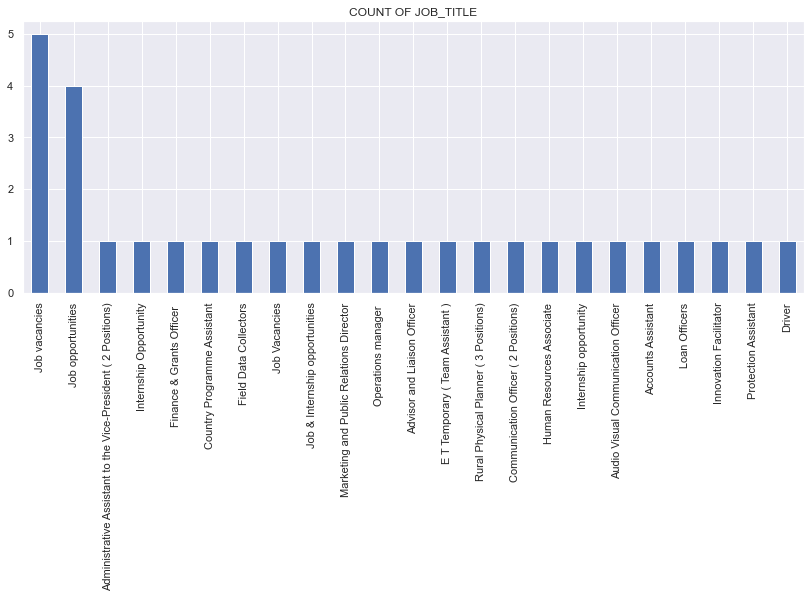

In [52]:
#plotting of top_30 job_title with count
final_top_30['job_title'].value_counts().plot(kind='bar', figsize=(14,5))
plt.title("COUNT OF JOB_TITLE")



In [53]:
final1=final.iloc[:30]
final1

,index_x,title,job_url,location,closing_Date,index_y,job_title,company_name
0,0,Administrative Assistant to the Vice-President...,https://www.ndangira.net/administrative-assist...,Kigali,"May 05,2022",0,Administrative Assistant to the Vice-President...,SENATE
1,1,Communication Officer ( 2 Positions) – SENATE,https://www.ndangira.net/communication-officer-2/,Kigali,"May 05,2022",1,Communication Officer ( 2 Positions),SENATE
2,2,Protection Assistant – UNHCR Rwanda,https://www.ndangira.net/protection-assistant-...,Huye,"May 09,2022",2,Protection Assistant,UNHCR Rwanda
3,3,Innovation Facilitator – FAO Rwanda,https://www.ndangira.net/innovation-facilitato...,Kigali,"May 10,2022",3,Innovation Facilitator,FAO Rwanda
4,4,Loan Officers – ASA Microfinance (Rwanda) Plc,https://www.ndangira.net/loan-officers-asa-mic...,Kigali,"May 20,2022",4,Loan Officers,ASA Microfinance (Rwanda) Plc
5,0,Job vacancies – Save the Children,https://www.ndangira.net/save-the-children-job...,Kigali,Varies,0,Job vacancies,Save the Children
6,1,Job opportunities – World Relief Rwanda,https://www.ndangira.net/job-vacancies-world-r...,Kigali,Varies,1,Job opportunities,World Relief Rwanda
7,2,Job opportunities – Rwanda Development Organiz...,https://www.ndangira.net/job-opportunities-rwa...,Kigali,"April 29,2022",2,Job opportunities,Rwanda Development Organization (RDO)
8,3,Job vacancies – Energy Development Corporation...,https://www.ndangira.net/job-vacancies-energy-...,Kigali,"May 04,2022",3,Job vacancies,Energy Development Corporation Limited (EDCL)
9,4,Job opportunities – Interpeace,https://www.ndangira.net/job-opportunities-int...,Kigali,"May 04 & 06,2022",4,Job opportunities,Interpeace


In [54]:
company_name=final['job_title']
company_name


0      Administrative Assistant to the Vice-President...
1                   Communication Officer ( 2 Positions)
2                                   Protection Assistant
3                                 Innovation Facilitator
4                                          Loan Officers
                             ...                        
137                     Advocacy & Communication Officer
138                              Project finance officer
139            Customs technical officer ( 19 Positions)
140    Job announcement under Sugira Muryango : Scali...
141                           Strategy and Policy Expert
Name: job_title, Length: 142, dtype: object

In [55]:
location=final['location']
location


0        Kigali
1        Kigali
2          Huye
3        Kigali
4        Kigali
         ...   
137      Kigali
138      Kigali
139     Rwanda 
140      Kigali
141      Kigali
Name: location, Length: 142, dtype: object

In [56]:
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'COUNT OF  COMPANY_NAME')

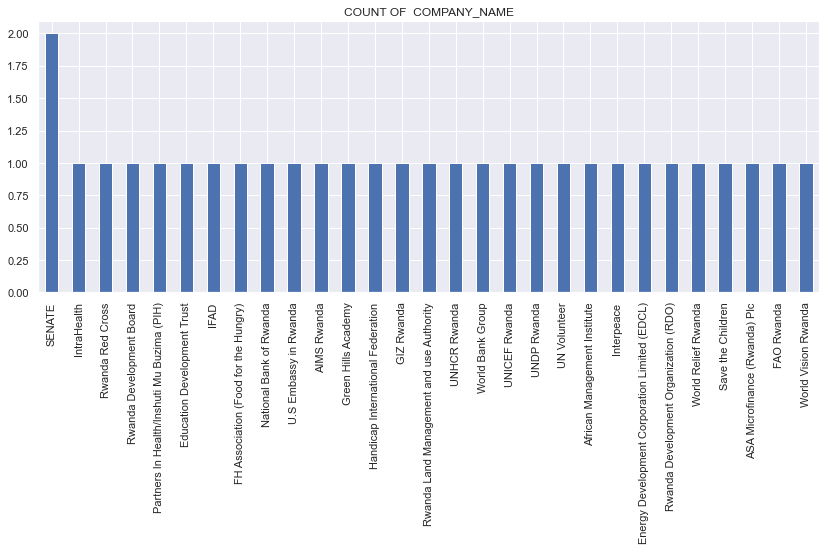

In [57]:
#plotting of top_30 company with count
final1['company_name'].value_counts().plot(kind='bar', figsize=(14,5))
plt.title("COUNT OF  COMPANY_NAME")


Text(0.5, 1.0, 'Location vs Job_title')

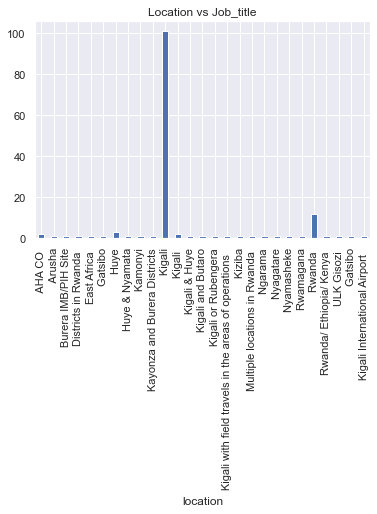

In [62]:
final.groupby('location')['job_title'].count().plot(kind='bar')
plt.title("Location vs Job_title")

<AxesSubplot:xlabel='company_name'>

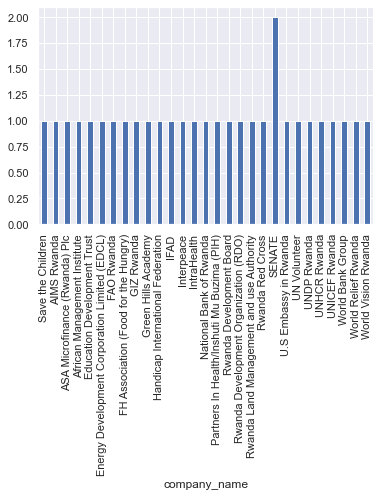

In [64]:
final1.groupby('company_name')['job_title'].count().plot(kind='bar')

In [ ]:
final.describe()

In [ ]:
final